In [25]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
from fastai.vision import conv_layer
from fastai.vision.data import SegmentationLabelList, SegmentationProcessor, SegmentationItemList
from fastai.vision.transform import get_transforms
from fastai.vision.image import open_image, open_mask, Image
from pathlib import Path
import matplotlib.pyplot as plt
from torch import nn
import pdb

# class ImageImageSegment(ItemBase):
#     def __init__(self, img1, segment):
#         self.img1, self.segment = img1, segment
#         self.obj, self.data = (img1, segment), [-1+2*img1.data, segment.data]

#     def apply_tfms(self, tfms, **kwargs):
#         self.img1 = self.img1.apply_tfms(tfms, **kwargs)
#         self.segment = self.segment.apply_tfms(tfms, **kwargs)
#         self.data = [-1+2*self.img1.data, self.segment.data]
#         return self

#     def to_one(self): return Image(0.5+torch.cat(self.data,2)/2)


# class SpadeLabelList(SegmentationItemList):
#     "`ItemList` for segmentation masks."
# #     _processor = SpadeProcessor
#     def __init__(self, items, **kwargs):
#         super().__init__(items, **kwargs)
#              #  loss function to be added

#     def open(self, fn, **kwargs):
#         return open_image(fn[0], **kwargs), open_mask(fn[1], **kwargs)
    
#     def analyze_pred(self, pred, thresh:float=0.5):
#         return pred
    
#     def reconstruct(self, t):
#         return Image(t[0]), ImageSegment(t[1])

class SpadeLabelList(SegmentationItemList):
    "`ItemList` for segmentation masks."
#     _processor = SpadeProcessor
    def __init__(self, items, **kwargs):
        super().__init__(items, **kwargs)
             #  loss function to be added

    def open(self, fn, **kwargs):
        return open_image(fn, **kwargs)
    
    def analyze_pred(self, pred, thresh:float=0.5):
        return pred
    
    def reconstruct(self, t):
        return Image(t)

class SpadeItemList(SegmentationLabelList):
    "`ItemList` suitable for segmentation tasks."
    _label_cls,_square_show_res = SpadeLabelList, False
    
    def show_xys(self, xs, ys, **kwargs):
        rows = len(xs)
        fig, ax = plt.subplots(rows, 2, figsize=(30,30))
        for i in range(rows):
            xs[i].show(ax=ax[i,0], figsize=(7,7))
            ys[i].show(ax=ax[i,1], figsize=(7,7))

In [28]:

import fastai
print(fastai.__file__, fastai.__version__)

/usr/local/lib/python3.7/dist-packages/fastai/__init__.py 1.0.61


In [29]:
path = Path('/content/drive/MyDrive/brain tumor segmentation/huzaifa data/SPADE Data/train/')
batch_size = 8

In [30]:
path.ls()

[PosixPath('/content/drive/MyDrive/brain tumor segmentation/huzaifa data/SPADE Data/train/img'),
 PosixPath('/content/drive/MyDrive/brain tumor segmentation/huzaifa data/SPADE Data/train/msk')]

In [31]:
pth_img = path/'img'
pth_lbs = path/'msk'

In [32]:
from fastai.vision import *
from fastai.callbacks.hooks import *

In [33]:
fnames = get_image_files(pth_img)
fnames[:3]

[]

In [162]:
#############################################################


import numpy as np
import nibabel as nib
import glob
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tifffile import imsave
from PIL import Image
import matplotlib

for img in range(51):   #Using t1_list as all lists are of same size
    print("Now preparing image and masks number: ", img)
      
    temp_image = np.load('/content/drive/MyDrive/brain tumor segmentation/huzaifa data/SPADE Data/val/img/image_'+str(img+150)+'.npy')
    temp_mask = np.load('/content/drive/MyDrive/brain tumor segmentation/huzaifa data/SPADE Data/val/msk/mask_'+str(img+150)+'.npy')
    #im_frame = Image.open('/content/drive/MyDrive/brain tumor segmentation/huzaifa data/SPADE Data/val/img/image_'+str(img+150)+'.png')
    #msk_frame = Image.open('/content/drive/MyDrive/brain tumor segmentation/huzaifa data/SPADE Data/val/msk/mask_'+str(img)+'.png')

    #im_np_frame = np.array(im_frame.getdata())
    #msk_np_frame = np.array(msk_frame.getdata())



    #matplotlib.image.imsave('/content/drive/MyDrive/brain tumor segmentation/huzaifa data/SPADE Data/val/img/'+str(img)+'.png', temp_image)
    matplotlib.image.imsave('/content/drive/MyDrive/brain tumor segmentation/huzaifa data/SPADE Data/val/msk/'+str(img)+'_m.png', temp_mask)

#################################################

Now preparing image and masks number:  0
Now preparing image and masks number:  1
Now preparing image and masks number:  2
Now preparing image and masks number:  3
Now preparing image and masks number:  4
Now preparing image and masks number:  5
Now preparing image and masks number:  6
Now preparing image and masks number:  7
Now preparing image and masks number:  8
Now preparing image and masks number:  9
Now preparing image and masks number:  10
Now preparing image and masks number:  11
Now preparing image and masks number:  12
Now preparing image and masks number:  13
Now preparing image and masks number:  14
Now preparing image and masks number:  15
Now preparing image and masks number:  16
Now preparing image and masks number:  17
Now preparing image and masks number:  18
Now preparing image and masks number:  19
Now preparing image and masks number:  20
Now preparing image and masks number:  21
Now preparing image and masks number:  22
Now preparing image and masks number:  23
No

In [165]:
path = Path('/content/drive/MyDrive/brain tumor segmentation/huzaifa data/SPADE Data/val/')
batch_size = 2

In [166]:
path.ls()

[PosixPath('/content/drive/MyDrive/brain tumor segmentation/huzaifa data/SPADE Data/val/img'),
 PosixPath('/content/drive/MyDrive/brain tumor segmentation/huzaifa data/SPADE Data/val/msk')]

In [167]:
pth_img = path/'img'
pth_lbs = path/'msk'

In [177]:
fnames = get_image_files(pth_img)
fnames[:45]

[PosixPath('/content/drive/MyDrive/brain tumor segmentation/huzaifa data/SPADE Data/val/img/0.png'),
 PosixPath('/content/drive/MyDrive/brain tumor segmentation/huzaifa data/SPADE Data/val/img/1.png'),
 PosixPath('/content/drive/MyDrive/brain tumor segmentation/huzaifa data/SPADE Data/val/img/2.png'),
 PosixPath('/content/drive/MyDrive/brain tumor segmentation/huzaifa data/SPADE Data/val/img/3.png'),
 PosixPath('/content/drive/MyDrive/brain tumor segmentation/huzaifa data/SPADE Data/val/img/4.png'),
 PosixPath('/content/drive/MyDrive/brain tumor segmentation/huzaifa data/SPADE Data/val/img/5.png'),
 PosixPath('/content/drive/MyDrive/brain tumor segmentation/huzaifa data/SPADE Data/val/img/6.png'),
 PosixPath('/content/drive/MyDrive/brain tumor segmentation/huzaifa data/SPADE Data/val/img/7.png'),
 PosixPath('/content/drive/MyDrive/brain tumor segmentation/huzaifa data/SPADE Data/val/img/8.png'),
 PosixPath('/content/drive/MyDrive/brain tumor segmentation/huzaifa data/SPADE Data/val/img

In [169]:
lnames = get_image_files(pth_lbs)
lnames[:5]

[PosixPath('/content/drive/MyDrive/brain tumor segmentation/huzaifa data/SPADE Data/val/msk/0_m.png'),
 PosixPath('/content/drive/MyDrive/brain tumor segmentation/huzaifa data/SPADE Data/val/msk/1_m.png'),
 PosixPath('/content/drive/MyDrive/brain tumor segmentation/huzaifa data/SPADE Data/val/msk/2_m.png'),
 PosixPath('/content/drive/MyDrive/brain tumor segmentation/huzaifa data/SPADE Data/val/msk/3_m.png'),
 PosixPath('/content/drive/MyDrive/brain tumor segmentation/huzaifa data/SPADE Data/val/msk/4_m.png')]

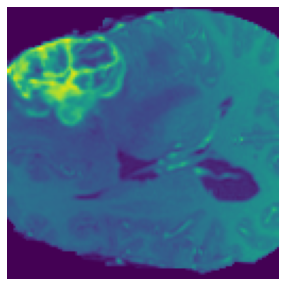

In [209]:
img_00 = fnames[28]
img = open_image(img_00)
img.show(figsize = (5,5)) 

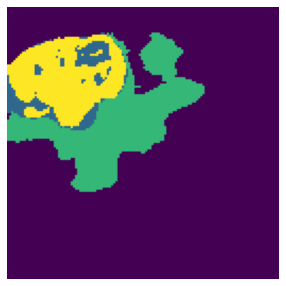

In [210]:
img_01 = lnames[28]
img = open_image(img_01)
img.show(figsize = (5,5)) 

In [180]:
get_y_fun = lambda x:pth_lbs/f'{x.stem}_m{x.suffix}'

In [ ]:
'''def get_y_func(x, ext='png'):
  try :
    return x.parents[1] / 'msk' / ('mask' + x.stem[5] + x.stem[6] + x.stem[7] + '.{}'.format(ext))
  except:
    return x.parents[1] / 'msk' / ('mask' + x.stem[5] + x.stem[6] + '.{}'.format(ext))'''

In [198]:
#def get_y_func(x, ext='png'):
    #return x.parents[1] / 'msk' / (x.stem + '_m.{}'.format(ext))

In [211]:
get_y_fun(img_00)

PosixPath('/content/drive/MyDrive/brain tumor segmentation/huzaifa data/SPADE Data/val/msk/28_m.png')

In [212]:
mskkk = open_image(get_y_func(img_00))

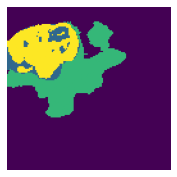

In [213]:
mskkk.show()

In [188]:
codes = ['0', '1', '2', '3']

In [230]:
src = (SpadeItemList.from_folder(path/'msk', classes=codes)
      .split_by_rand_pct()
      .label_from_func(get_y_func))

In [ ]:
#data = (src.transform(get_transforms(), tfm_y=True, size=128)
       #.databunch(bs=batch_size))

In [232]:
src = (SegmentationItemList.from_folder(pth_img)
  .split_by_rand_pct()
  .label_from_func(get_y_fun, classes = codes))

In [225]:
data = (src.transform(get_transforms(), size = 128, tfm_y = True)
  .databunch(bs = batch_size)
  )


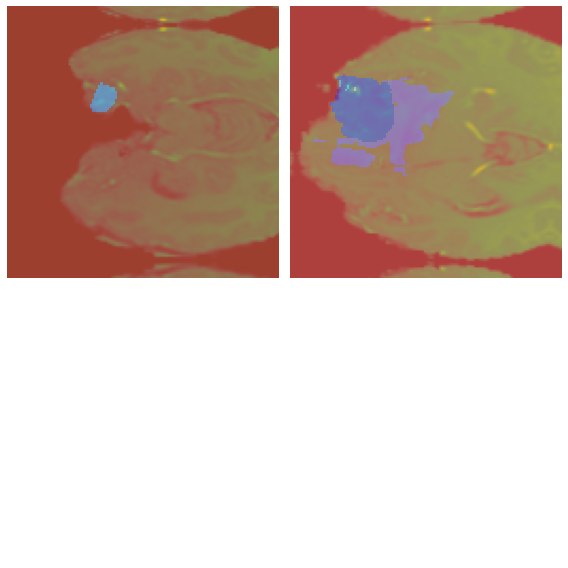

In [229]:
data.show_batch(rows=2)

In [233]:
from fastai.vision import ImageSegment, PixelShuffle_ICNR
from fastai.layers import NormType
import torch.nn.functional as F
from torch.nn.utils import spectral_norm
from torch.distributions import Normal
import torch

In [234]:
class SpadeBN(nn.Module):
    def __init__(self, nf):
        super(SpadeBN, self).__init__()

        self.bn = nn.BatchNorm2d(nf, affine=False)
        self.conv0 = conv_layer(1, 128, norm_type=NormType.Spectral)  # hardcoded
        self.conv1 = conv_layer(128, nf, norm_type=NormType.Spectral)
        self.conv2 = conv_layer(128, nf, norm_type=NormType.Spectral)
        
    def forward(self, features, mask):
#         pdb.set_trace()
        size = features.size()[-2:]
        mask = F.interpolate(mask.float(), size=size)
        interim_conv = self.conv0(mask)
        gamma = self.conv1(interim_conv)
        beta = self.conv2(interim_conv)
        return (self.bn(features) * gamma) + beta

In [235]:
class SpadeResBlock(nn.Module):
    def __init__(self, ni, nf):
        super(SpadeResBlock, self).__init__()
        self.spade_bn0 = SpadeBN(ni)
        ## can get away with spectral norm by passing NormType.Spectral
        self.conv0 = conv_layer(ni, nf, use_activ=False, norm_type=NormType.Spectral)
        self.spade_bn1 = SpadeBN(nf)
        self.conv1 = conv_layer(nf, nf, use_activ=False, norm_type=NormType.Spectral)
        self.spade_skip = SpadeBN(ni)
        self.conv_skip = conv_layer(ni, nf, use_activ=False, norm_type=NormType.Spectral, )
        
    def forward(self, features, mask):
        skip_features = self.conv_skip(F.relu(self.spade_skip(features, mask)))
        features = self.conv0(F.relu(self.spade_bn0(features, mask)))
        features = self.conv1(F.relu(self.spade_bn1(features, mask)))
        return skip_features + features

In [236]:
device_ = torch.device('cuda')

In [237]:
class UpsamplingNearest2d(nn.Module):
    def forward(self, x):
        return F.interpolate(x, scale_factor=2)

In [250]:
# nfs = [1024,1024,1024,512,256,128,64] #orig
#nfs = [1024,1024,512,256,128,64]
nfs = [512,256,128,64]
scale = [2] * len(nfs)
input_noise_dim = 128

class SpadeGenerator(nn.Module):
    
    def __init__(self, input_noise_dim=input_noise_dim,
                 nfs=nfs,
                 pixel_shuffle_upsampling=True,
                 batch_size=batch_size,
                 input_image=None):  ## for semantic style, requires different loss functions
        super(SpadeGenerator, self).__init__()
        self.input_noise_dim = input_noise_dim
        self.batch_size = batch_size
        self.linear = nn.Linear(input_noise_dim, 16384)  # hardcoded
        self.spade_upsample_blocks = nn.ModuleList([])
        for i in range(len(nfs)):
            self.spade_upsample_blocks.append(nn.ModuleList([SpadeResBlock(1024 if i == 0 else nfs[i-1], nfs[i]),
                           PixelShuffle_ICNR(nfs[i], nfs[i], scale=2, norm_type=NormType.Spectral) if pixel_shuffle_upsampling else UpsamplingNearest2d()]))
        self.conv_final = conv_layer(nfs[-1], 3, use_activ=False, bias=True, norm_type=None)
    
    def forward(self, mask):
#         pdb.set_trace()
        
#         mask = args[0]
        gaussian_noise = Normal(0,1).sample(torch.Size([mask.size()[0], self.input_noise_dim])).to(device_).detach()
        linear_features = self.linear(gaussian_noise)
        spatial_features = linear_features.view(self.batch_size, 1024, 4, 4) # hardcoded
        for block in self.spade_upsample_blocks:
            spatial_features = block[0](spatial_features, mask)
            spatial_features = block[1](spatial_features)
#         pdb.set_trace()
        return (torch.tanh(self.conv_final(spatial_features)) + 1)/2

In [239]:

test_gen = SpadeGenerator().to(device_)

In [240]:

inp = torch.randn(2,1,128,128).to(device_)

In [241]:
x, y = next(iter(data.train_dl))

In [242]:
from fastai.vision import open_mask, ImageSegment

In [243]:
x.shape

torch.Size([2, 3, 128, 128])

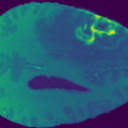

In [244]:
ImageSegment(x[0])

In [245]:
import matplotlib.pyplot as plt

In [246]:
torch.cuda.empty_cache()

In [247]:
from fastai.layers import Lambda

In [248]:
def AvgFlatten():
    "Takes the average of the input."
    return Lambda(lambda x: x.mean((1,2,3)))#.view(1))

In [249]:
device_ = torch.device('cuda')

In [251]:
disc_nfs = [64,128,256,512]

class SpadeDiscriminator(nn.Module):
    def __init__(self, disc_nfs=disc_nfs):
        super(SpadeDiscriminator, self).__init__()
        self.layers = []
        
        self.conv0 = conv_layer(ni=4, nf=64, ks=4, stride=2, bias=True, norm_type=NormType.Spectral, use_activ=False)
        
        self.conv1 = conv_layer(ni=64, nf=128, ks=4, stride=2, bias=True, norm_type=NormType.Spectral, use_activ=False)
        self.in1 = nn.InstanceNorm2d(128)
        self.lrelu = nn.LeakyReLU(negative_slope=0.2, inplace=True)
        self.conv2 = conv_layer(ni=128, nf=256, ks=4, stride=2, bias=True, norm_type=NormType.Spectral, use_activ=False)
        self.in2 = nn.InstanceNorm2d(256)
        self.conv3 = conv_layer(ni=256, nf=512, ks=4, bias=True, norm_type=NormType.Spectral, use_activ=False)
        self.in3 = nn.InstanceNorm2d(512)         

        ### skipping a layer which seems to be a mistake in the paper.
        self.conv_final = conv_layer(ni=512, nf=1, ks=4, bias=True, norm_type=NormType.Spectral, use_activ=False) #hardcoded
#         self.layers.append(AvgFlatten())
#         self.disc = nn.Sequential(*self.layers)
        
    def forward(self, image, mask, down=2): # modified multiscale discriminator
#         pdb.set_trace()
        final = torch.zeros(image.shape[0], dtype=image.dtype).to(device_)
        for i in range(down + 1):
            if i != 0:
                image = F.avg_pool2d(image, 2, 2) # downsampling
                mask = F.avg_pool2d(mask.type(image.dtype), 2, 2) # downsampling
            
#             print(image.shape, mask.shape)
            inp = torch.cat((image, mask.type(image.dtype)), dim=1)

            feat1 = self.lrelu(self.conv0(inp))# will use these features later
#                 print(feat1.shape)
            feat2 = self.lrelu(self.in1(self.conv1(feat1)))
#                 print(feat2.shape)
            feat3 = self.lrelu(self.in2(self.conv2(feat2)))
            feat4 = self.lrelu(self.in3(self.conv3(feat3)))
            final += self.conv_final(feat4).mean(dim=(1,2,3))  # adding all
#             print(self.conv_final(feat4).mean())
#         pdb.set_trace()
#         print('in critic')
        return final  ## taking mean/sum

In [252]:

test_disc = SpadeDiscriminator().cuda()

In [255]:
im = torch.randn(2,1,128,128).cuda()
mask = torch.Tensor(2,3,128,128).cuda()

In [256]:
test_disc(im, mask, down=2).shape

torch.Size([2])

In [257]:
class GANModule(nn.Module):
    "Wrapper around a `generator` and a `critic` to create a GAN."
    def __init__(self, generator:nn.Module=None, critic:nn.Module=None, gen_mode:bool=False):
        super().__init__()
        self.gen_mode = gen_mode
        if generator: self.generator,self.critic = generator,critic

    def forward(self, *args):
        return self.generator(*args) if self.gen_mode else self.critic(*args)

    def switch(self, gen_mode:bool=None):
        "Put the model in generator mode if `gen_mode`, in critic mode otherwise."
        self.gen_mode = (not self.gen_mode) if gen_mode is None else gen_mode

In [258]:

class GANLoss(GANModule):
    "Wrapper around `loss_funcC` (for the critic) and `loss_funcG` (for the generator)."
    def __init__(self, loss_funcG, loss_funcC, gan_model:GANModule):
        super().__init__()
        self.loss_funcG,self.loss_funcC,self.gan_model = loss_funcG,loss_funcC,gan_model

    def generator(self, output, target):
        "Evaluate the `output` with the critic then uses `self.loss_funcG` to combine it with `target`."
        fake_pred = self.gan_model.critic(output, target)
        return self.loss_funcG(fake_pred)

    def critic(self, real_pred, input):
        "Create some `fake_pred` with the generator from `input` and compare them to `real_pred` in `self.loss_funcD`."
        fake = self.gan_model.generator(input.requires_grad_(False)).requires_grad_(True)
        fake_pred = self.gan_model.critic(fake, input.requires_grad_(False))
        return self.loss_funcC(real_pred, fake_pred)

In [259]:
from fastai.basic_train import LearnerCallback
from fastai.basic_train import Learner
from fastai.callback import SmoothenValue

def num_children(m:nn.Module)->int:
    "Get number of children modules in `m`."
    return len(list(m.children()))

def requires_grad(m:nn.Module, b=None):
    "If `b` is not set `requires_grad` on all params in `m`, else return `requires_grad` of first param."
    ps = list(m.parameters())
    if not ps: return None
    if b is None: return ps[0].requires_grad
    for p in ps: p.requires_grad=b


flatten_model = lambda m: sum(map(flatten_model,m.children()),[]) if num_children(m) else [m]

class GANTrainer(LearnerCallback):
    "Handles GAN Training."
    _order=-20
    def __init__(self, learn:Learner, switch_eval:bool=False, clip:float=None, beta:float=0.98, gen_first:bool=False,
                 show_img:bool=True):
#         pdb.set_trace()
        super().__init__(learn)
        self.switch_eval,self.clip,self.beta,self.gen_first,self.show_img = switch_eval,clip,beta,gen_first,show_img
        self.generator,self.critic = self.model.generator,self.model.critic

    def _set_trainable(self):
        train_model = self.generator if     self.gen_mode else self.critic
        loss_model  = self.generator if not self.gen_mode else self.critic
        requires_grad(train_model, True)
        requires_grad(loss_model, False)
        if self.switch_eval:
            train_model.train()
            loss_model.eval()

    def on_train_begin(self, **kwargs):
        "Create the optimizers for the generator and critic if necessary, initialize smootheners."
        if not getattr(self,'opt_gen',None):
            self.opt_gen = self.opt.new([nn.Sequential(*flatten_model(self.generator))])
        else: self.opt_gen.lr,self.opt_gen.wd = self.opt.lr,self.opt.wd
        if not getattr(self,'opt_critic',None):
            self.opt_critic = self.opt.new([nn.Sequential(*flatten_model(self.critic))])
        else: self.opt_critic.lr,self.opt_critic.wd = self.opt.lr,self.opt.wd
        self.gen_mode = self.gen_first
        self.switch(self.gen_mode)
        self.closses,self.glosses = [],[]
        self.smoothenerG,self.smoothenerC = SmoothenValue(self.beta),SmoothenValue(self.beta)
        self.recorder.no_val=True
        self.recorder.add_metric_names(['gen_loss', 'disc_loss'])
        self.imgs,self.titles = [],[]

    def on_train_end(self, **kwargs):
        "Switch in generator mode for showing results."
        self.switch(gen_mode=True)

    def on_batch_begin(self, last_input, last_target, **kwargs):
        "Clamp the weights with `self.clip` if it's not None, return the correct input."
        # set_trace()
        if self.clip is not None:
            for p in self.critic.parameters(): p.data.clamp_(-self.clip, self.clip)
        return ([last_input], last_input) if self.gen_mode else ([last_target, last_input], last_input)

    def on_backward_begin(self, last_loss, last_output, **kwargs):
        "Record `last_loss` in the proper list."
        last_loss = last_loss.detach().cpu()
        if self.gen_mode:
            self.smoothenerG.add_value(last_loss)
            self.glosses.append(self.smoothenerG.smooth)
            self.last_gen = last_output.detach().cpu()
        else:
            self.smoothenerC.add_value(last_loss)
            self.closses.append(self.smoothenerC.smooth)

    def on_epoch_begin(self, epoch, **kwargs):
        "Put the critic or the generator back to eval if necessary."
        self.switch(self.gen_mode)

    def on_epoch_end(self, pbar, epoch, **kwargs):
        "Put the various losses in the recorder and show a sample image."
        self.recorder.add_metrics([getattr(self.smoothenerG,'smooth',None),getattr(self.smoothenerC,'smooth',None)])
        if not hasattr(self, 'last_gen') or not self.show_img: return
        data = self.learn.data
        img = self.last_gen[0]
        norm = getattr(data,'norm',False)
        if norm and norm.keywords.get('do_y',False): img = data.denorm(img)
        img = data.train_ds.y.reconstruct(img)
        self.imgs.append(img)
        self.titles.append(f'Epoch {epoch}')
        pbar.show_imgs(self.imgs, self.titles)

    def switch(self, gen_mode:bool=None):
        "Switch the model, if `gen_mode` is provided, in the desired mode."
        self.gen_mode = (not self.gen_mode) if gen_mode is None else gen_mode
        self.opt.opt = self.opt_gen.opt if self.gen_mode else self.opt_critic.opt
        self._set_trainable()
        self.model.switch(gen_mode)
        self.loss_func.switch(gen_mode)

In [260]:
from dataclasses import dataclass
from fastai.basic_train import LearnerCallback

@dataclass
class FixedGANSwitcher(LearnerCallback):
    "Switcher to do `n_crit` iterations of the critic then `n_gen` iterations of the generator."
    n_crit=5
    n_gen=1

    def on_train_begin(self, **kwargs):
        "Initiate the iteration counts."
        self.n_c,self.n_g = 0,0

    def on_batch_end(self, iteration, **kwargs):
        "Switch the model if necessary."
        if self.learn.gan_trainer.gen_mode:
            self.n_g += 1
            n_iter,n_in,n_out = self.n_gen,self.n_c,self.n_g
        else:
            self.n_c += 1
            n_iter,n_in,n_out = self.n_crit,self.n_g,self.n_c
        target = n_iter if isinstance(n_iter, int) else n_iter(n_in)
        if target == n_out:
            self.learn.gan_trainer.switch()
            self.n_c,self.n_g = 0,0

In [261]:
from fastai.basic_train import Learner
from functools import partial
class GANLearner(Learner):
    "A `Learner` suitable for GANs."
    def __init__(self, data, generator:nn.Module, critic:nn.Module, gen_loss_func,
                 crit_loss_func, switcher=None, gen_first:bool=False, switch_eval:bool=True,
                 show_img:bool=True, clip:float=None, **kwargs):
        gan = GANModule(generator, critic)
        loss_func = GANLoss(gen_loss_func, crit_loss_func, gan)
        switcher = FixedGANSwitcher
        super().__init__(data, gan, loss_func=loss_func, callback_fns=[switcher], **kwargs)
        trainer = GANTrainer(self, clip=clip, switch_eval=switch_eval, show_img=show_img)
        self.gan_trainer = trainer
        self.callbacks.append(trainer)

In [262]:
from fastai.layers import NoopLoss, Lambda

In [263]:
class disc_loss(nn.Module):
    def forward(self, real, fake):
#         print('disc loss')
        return F.relu(1 - real).mean() + F.relu(1 + fake).mean()

In [264]:
class gen_loss(nn.Module):
    def forward(self, fake):
#         print('gen loss')
        return -1 * fake.mean()

In [265]:
generator = SpadeGenerator()

In [266]:

discriminator = SpadeDiscriminator()

In [273]:
spadegan = GANLearner(data,
                      generator=generator,
                      critic=discriminator,
                      gen_loss_func=gen_loss(),
                      crit_loss_func=disc_loss()
                      )

In [268]:
spadegan.lr_find()

TypeError: ignored

In [269]:

spadegan.recorder.plot()

AttributeError: ignored

In [272]:
spadegan.fit(epochs=10)

TypeError: ignored